In [137]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [138]:
# Reading whale returns
whale_returns = Path("C:/Users/saif_/OneDrive/Desktop/Resources/whale_returns.csv")

In [139]:
whale_df = pd.read_csv(whale_returns)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [140]:
# Count nulls
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [141]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [142]:
# Reading algorithmic returns
algo_returns = Path("C:/Users/saif_/OneDrive/Desktop/Resources/algo_returns.csv")

In [233]:
algo_df = pd.read_csv(algo_returns)
algo_df.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [234]:
algo_df.dtypes

Date       object
Algo 1    float64
Algo 2    float64
dtype: object

In [235]:
# Count nulls
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [236]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [237]:
#Reading S&P TSX 60 Closing Prices:
s_and_p_returns = Path("C:/Users/saif_/OneDrive/Desktop/sp_tsx_history.csv")
s_and_p_df = pd.read_csv(s_and_p_returns)
s_and_p_df.head()

,Date,Close
0,01-Oct-12,"$12,370.19"
1,02-Oct-12,"$12,391.23"
2,03-Oct-12,"$12,359.47"
3,04-Oct-12,"$12,447.68"
4,05-Oct-12,"$12,418.99"


In [238]:
# Drop nulls
s_and_p_df['Close'] = s_and_p_df['Close'].str.replace(r'\$', "")
print(s_and_p_df)

           Date      Close
0     01-Oct-12  12,370.19
1     02-Oct-12  12,391.23
2     03-Oct-12  12,359.47
3     04-Oct-12  12,447.68
4     05-Oct-12  12,418.99
...         ...        ...
1813  20-Dec-19  17,118.44
1814  23-Dec-19  17,128.71
1815  24-Dec-19  17,180.15
1816  27-Dec-19  17,168.21
1817  30-Dec-19  17,098.56

[1818 rows x 2 columns]


C:\Users\saif_\AppData\Local\Temp\ipykernel_11652\3946973844.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  s_and_p_df['Close'] = s_and_p_df['Close'].str.replace(r'\$', "")


In [240]:
s_and_p_df['Close'] = s_and_p_df['Close'].str.replace(',', "")
print(s_and_p_df)

           Date     Close
0     01-Oct-12  12370.19
1     02-Oct-12  12391.23
2     03-Oct-12  12359.47
3     04-Oct-12  12447.68
4     05-Oct-12  12418.99
...         ...       ...
1813  20-Dec-19  17118.44
1814  23-Dec-19  17128.71
1815  24-Dec-19  17180.15
1816  27-Dec-19  17168.21
1817  30-Dec-19  17098.56

[1818 rows x 2 columns]


In [245]:
s_and_p_df.drop(columns=['Date'], inplace=True)
s_and_p_df.head()

,Close
0,12370.19
1,12391.23
2,12359.47
3,12447.68
4,12418.99


In [246]:
# Renaming to S&P TSX:
s_and_p_df.columns = ["S&P TSX"]
s_and_p_df.head()

,S&P TSX
0,12370.19
1,12391.23
2,12359.47
3,12447.68
4,12418.99


In [247]:
# Calculate Daily Returns
daily_returns = s_and_p_df['S&P TSX'].astype(float).pct_change()
daily_returns.head()

0         NaN
1    0.001701
2   -0.002563
3    0.007137
4   -0.002305
Name: S&P TSX, dtype: float64

In [248]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns = pd.concat([whale_df, s_and_p_df, algo_df], axis="columns", join="inner")
daily_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX,Date,Algo 1,Algo 2
6,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,12212.42,2014-06-05,0.004062,0.013285
7,2015-03-11,0.004012,0.005163,0.003312,-0.001147,12233.95,2014-06-06,0.001857,0.008284
8,2015-03-12,0.008265,0.010272,0.013117,0.010801,12202.04,2014-06-09,-0.005012,0.005668
9,2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,12229.96,2014-06-10,0.004406,-0.000735
10,2015-03-16,0.007901,0.003583,0.007953,0.008055,12407.70,2014-06-11,0.004760,-0.003761


<AxesSubplot:>

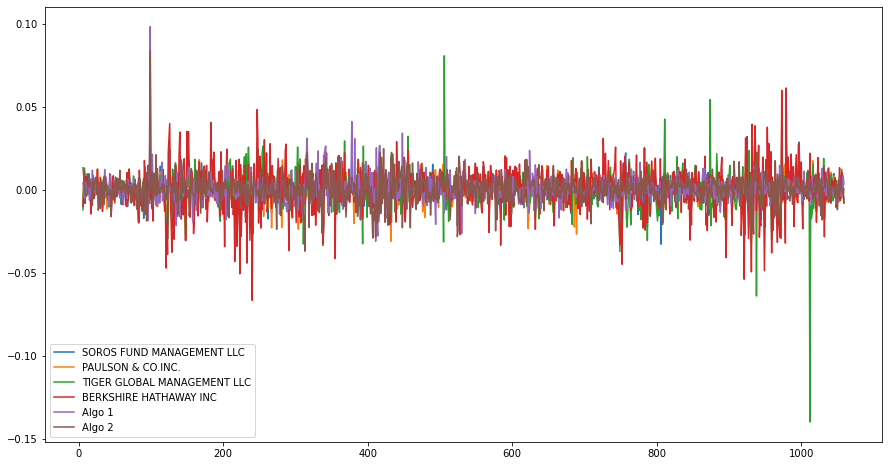

In [116]:
# Plot daily returns of all portfolios
daily_returns.plot(figsize=(15,8))

<AxesSubplot:>

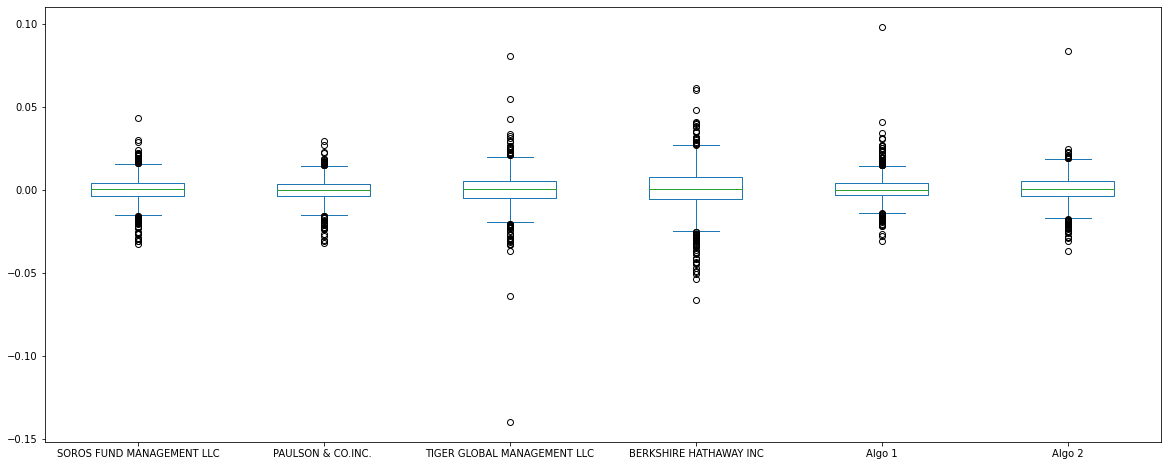

In [203]:
daily_returns.plot.box(figsize=(20,8))

In [204]:
# Calculate  the daily standard deviation of S&P TSX 60
daily_std = daily_returns.std()
print(daily_std)

SOROS FUND MANAGEMENT LLC      0.007855
PAULSON & CO.INC.              0.006988
TIGER GLOBAL MANAGEMENT LLC    0.010845
BERKSHIRE HATHAWAY INC         0.012850
Algo 1                         0.007745
Algo 2                         0.008265
dtype: float64


C:\Users\saif_\AppData\Local\Temp\ipykernel_11652\2031044200.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  daily_std = daily_returns.std()


In [205]:
 # Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124700
PAULSON & CO.INC.              0.110926
TIGER GLOBAL MANAGEMENT LLC    0.172156
BERKSHIRE HATHAWAY INC         0.203994
Algo 1                         0.122946
Algo 2                         0.131206
dtype: float64

C:\Users\saif_\AppData\Local\Temp\ipykernel_11652\1557790463.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Date'], dtype='object')
  daily_returns.rolling(window=21).std().plot(figsize=(15,8))


<AxesSubplot:>

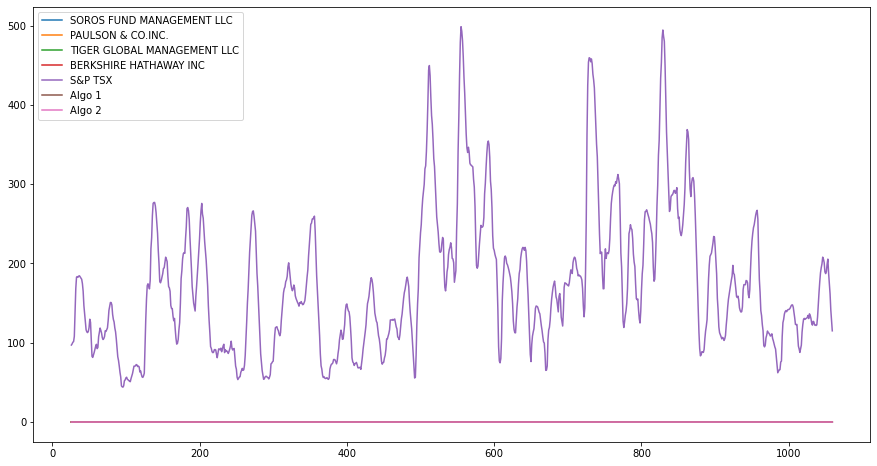

In [206]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
daily_returns.rolling(window=21).std().plot(figsize=(15,8))

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
SOROS FUND MANAGEMENT LLC,1.000000,0.700191,0.561548,0.754025,-0.013205,-0.003091
PAULSON & CO.INC.,0.700191,1.000000,0.435163,0.545549,-0.030506,-0.026532
TIGER GLOBAL MANAGEMENT LLC,0.561548,0.435163,1.000000,0.424908,-0.014538,-0.039470
BERKSHIRE HATHAWAY INC,0.754025,0.545549,0.424908,1.000000,-0.005687,-0.025006
Algo 1,-0.013205,-0.030506,-0.014538,-0.005687,1.000000,0.327996
Algo 2,-0.003091,-0.026532,-0.039470,-0.025006,0.327996,1.000000


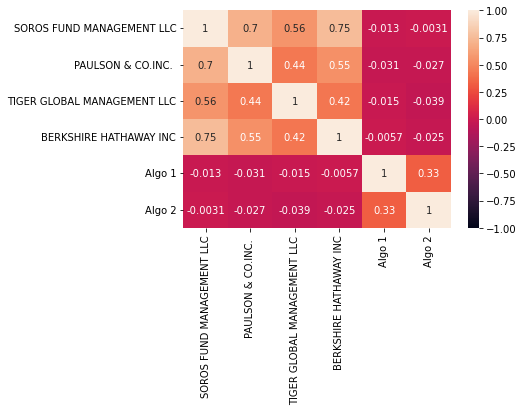

In [207]:
# Calculate the correlation & # Display de correlation matrix
import seaborn as sns
correlation = daily_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)# Display de correlation matrix
correlation

In [223]:
daily_returns = pd.concat([whale_df, s_and_p_df,algo_df], axis="columns", join="inner")
daily_returns.sort_index(inplace=True)
daily_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P TSX,Date,Algo 1,Algo 2
6,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,12212.42,2014-06-05,0.004062,0.013285
7,2015-03-11,0.004012,0.005163,0.003312,-0.001147,12233.95,2014-06-06,0.001857,0.008284
8,2015-03-12,0.008265,0.010272,0.013117,0.010801,12202.04,2014-06-09,-0.005012,0.005668
9,2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,12229.96,2014-06-10,0.004406,-0.000735
10,2015-03-16,0.007901,0.003583,0.007953,0.008055,12407.70,2014-06-11,0.004760,-0.003761


In [224]:
# calculate covariance of a single portfolio:
covariance = combined_df['BERKSHIRE HATHAWAY INC'].cov(combined_df['Close'])
covariance

nan

In [184]:
variance = combined_df['BERKSHIRE HATHAWAY INC'].var()
variance

nan

In [185]:
BERK_beta = covariance / variance
BERK_beta

nan

In [218]:
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['Close'])
rolling_variance = combined_df['Close'].rolling(window=60).var()

<AxesSubplot:>

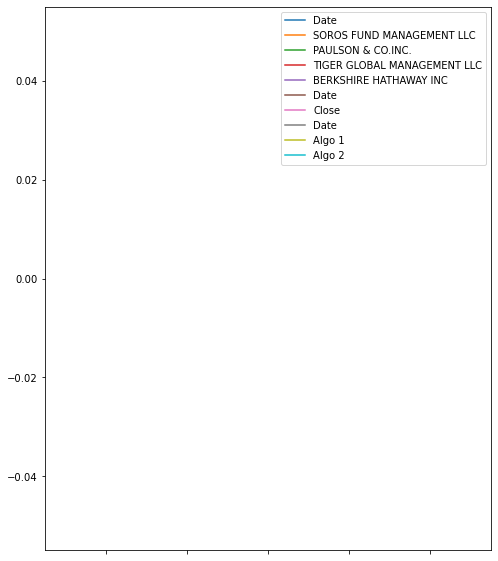

In [225]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife=21).std().plot(figsize=(8,10))

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Berkshire Hathaway'}>

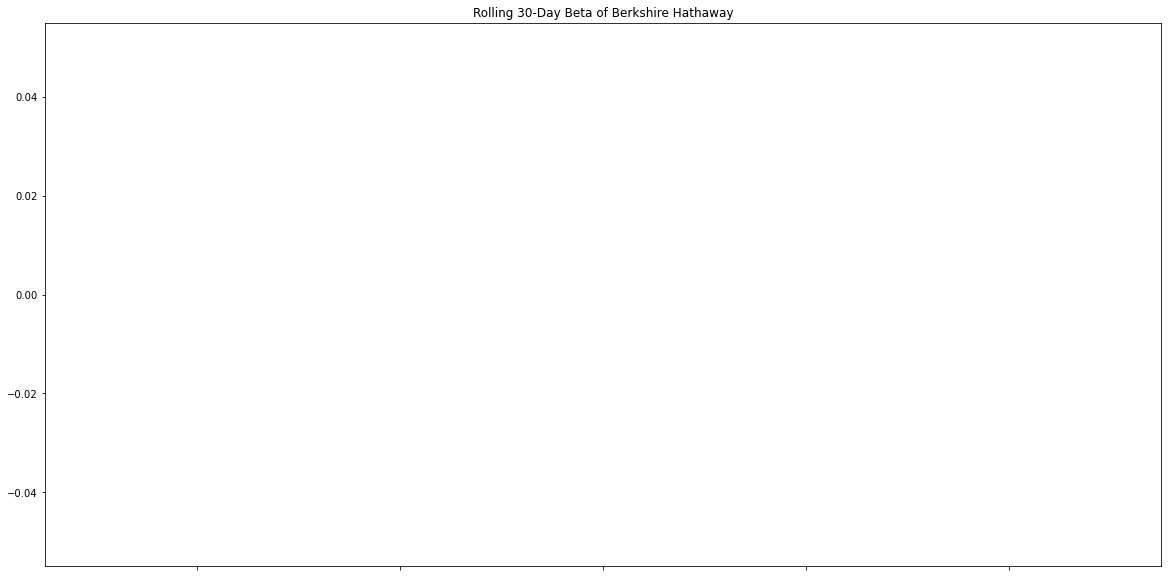

In [226]:
# Computing beta:
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Berkshire Hathaway')

In [190]:
# Annualized Sharpe Ratios:
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

Date                           NaN
SOROS FUND MANAGEMENT LLC      NaN
PAULSON & CO.INC.              NaN
TIGER GLOBAL MANAGEMENT LLC    NaN
BERKSHIRE HATHAWAY INC         NaN
Date                           NaN
Close                          NaN
Date                           NaN
Algo 1                         NaN
Algo 2                         NaN
dtype: object

<AxesSubplot:title={'center':'Sharpe Ratios'}>

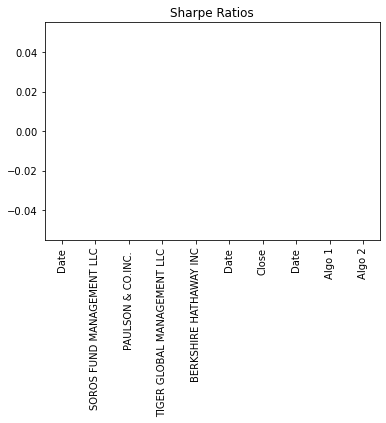

In [194]:
# Visualize the sharpe ratios as a bar plot:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")